<a href="https://colab.research.google.com/github/martin-fabbri/advanced-react-components/blob/master/feature_engineering/feature_engineering_categorical.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [54]:
!pip install -q kaggle
from google.colab import drive
drive.mount('/content/gdrive')
!mkdir -p ~/.kaggle
!cp /content/gdrive/My\ Drive/kaggle/kaggle.json ~/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d wendykan/lending-club-loan-data
!ls -l /content
!unzip -o /content/lending-club-loan-data

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
lending-club-loan-data.zip: Skipping, found more recently modified local copy (use --force to force download)
total 3180508
-rw-r--r-- 1 root root 1312145408 Sep 19 05:28 database.sqlite
drwx------ 4 root root       4096 Jan 31 02:50 gdrive
-rw-r--r-- 1 root root      23582 Sep 19 05:27 LCDataDictionary.xlsx
-rw-r--r-- 1 root root  755251835 Jan 31 02:51 lending-club-loan-data.zip
-rw-r--r-- 1 root root 1189395649 Sep 19 05:30 loan.csv
drwxr-xr-x 1 root root       4096 Jan 13 16:38 sample_data
Archive:  /content/lending-club-loan-data.zip
  inflating: LCDataDictionary.xlsx   
  inflating: database.sqlite         
  inflating: loan.csv                


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.utils import check_random_state

train_path = '/content/loan.csv'
rs = check_random_state(44)

In [0]:
use_cols = ['purpose', 'loan_status', 'home_ownership']
data = pd.read_csv(train_path, usecols=use_cols).sample(
  10000, random_state = rs
)

In [57]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 70642 to 676512
Data columns (total 3 columns):
home_ownership    10000 non-null object
loan_status       10000 non-null object
purpose           10000 non-null object
dtypes: object(3)
memory usage: 312.5+ KB


In [58]:
data.home_ownership.unique()

array(['MORTGAGE', 'RENT', 'OWN', 'ANY', 'OTHER'], dtype=object)

In [59]:
data['home_ownership'].value_counts()

MORTGAGE    4937
RENT        3980
OWN         1075
ANY            6
OTHER          2
Name: home_ownership, dtype: int64

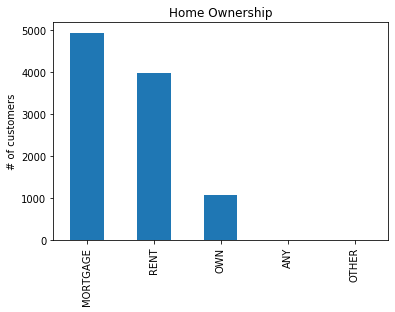

In [60]:
data['home_ownership'].value_counts().plot.bar()
plt.title('Home Ownership')
plt.ylabel('# of customers');

In [61]:
data.purpose.unique()

array(['other', 'debt_consolidation', 'home_improvement', 'credit_card',
       'moving', 'medical', 'car', 'major_purchase', 'house',
       'small_business', 'vacation', 'renewable_energy', 'wedding'],
      dtype=object)

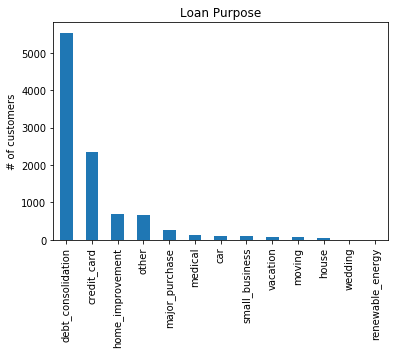

In [64]:
data.purpose.value_counts().plot.bar()
plt.title('Loan Purpose')
plt.ylabel('# of customers');

In [65]:
data.loan_status.unique()

array(['Current', 'Charged Off', 'Fully Paid',
       'Does not meet the credit policy. Status:Fully Paid',
       'Late (16-30 days)', 'Late (31-120 days)', 'In Grace Period',
       'Does not meet the credit policy. Status:Charged Off'],
      dtype=object)

Text(0, 0.5, 'Number of customers')

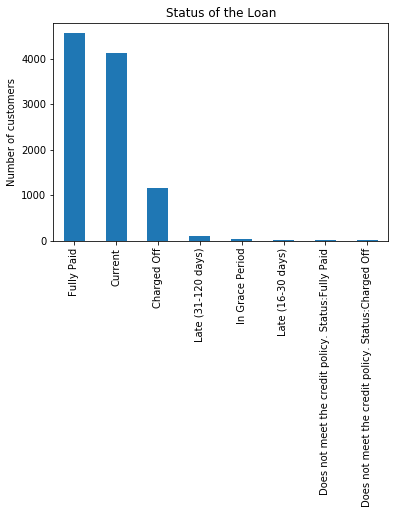

In [66]:
fig = data['loan_status'].value_counts().plot.bar()
fig.set_title('Status of the Loan')
fig.set_ylabel('Number of customers')